<h1 align=center><font size=5>Data Science and Machine Learning Capstone Project</font></h1>
<h2 align=center><font size=3; color=blue> Copyright &#169; Mustafizur Rahman</font></h2>

<p><b>BINARY CLASSIFICATION MODEL FOR MANHATTAN TOP TWO COMPLAINTS:</b> In this section, I will DEVELOP a classification model using features to predict future Complaint of top two complaint Type</p>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib

<h2>Import data from previous model where I save Clean data for analysis, visualization and Modeling.</h2>

In [2]:
filename='C:\\Users\\TOPU\Documents\\GitHub\\5. Data Science and Machine Learning Capstone Project\\Manhattan_Merged_top5_df_NoDummy.csv'

Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [3]:
df= pd.read_csv(filename)
df.head()

,Complaint Type,Address,Borough,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge
0,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
1,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
2,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
3,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
4,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0


In [7]:
print(df.columns)
#df.describe(include=['object'])
#df.corr()
print('matplotlib: {}'.format(matplotlib.__version__))

Index(['Complaint Type', 'Address', 'Borough', 'BldgArea', 'BldgDepth',
       'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
       'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'BldAge',
       'RenvAge'],
      dtype='object')
matplotlib: 3.1.0


<p>

select all features for the modeling. Also check the target data type (should be integer, as it is a requirement  by the skitlearn algorithm)</p>
<b>FEATURE SETS:BldgArea	BldgDepth	BuiltFAR	CommFAR	FacilFAR	LotArea	LotDepth	NumBldgs	NumFloors	OfficeArea	ResArea	ResidFAR	RetailArea	BldAge and	RenvAge</b>


In [4]:
#df_X1== Top 2 Complaint Type
df_X1=df[(df['Complaint Type']=="HEAT/HOT WATER") |(df['Complaint Type']=="HEATING")]
df_X1.reset_index(drop=True, inplace=True)
df_X1.head()

,Complaint Type,Address,Borough,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge
0,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
1,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
2,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
3,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0
4,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.057692,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0


In [5]:
df_X1['Complaint Type'].value_counts()

HEAT/HOT WATER    150461
HEATING           117398
Name: Complaint Type, dtype: int64

<p>Get Labeled variable/ indicator variables "Complaint Type"and assign it to data frame "dummy_variable_1" 

In [6]:
dummy_variable_1 = pd.get_dummies(df_X1['Complaint Type'])
dummy_variable_1.tail(30)

,HEAT/HOT WATER,HEATING
267829,1,0
267830,1,0
267831,1,0
267832,1,0
267833,1,0
267834,1,0
267835,1,0
267836,1,0
267837,1,0
267838,1,0


<p>We now have the value 0 to represent "HEAT/HOT WATER" and 1 to represent "HEATING" in the column "HEATING". We will now insert this column back into our original dataset and rename it as a </b>Compaint_type_lebel</b>.</p>

In [7]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df_X1, dummy_variable_1['HEATING']], axis=1)
#change column names for clarity
df.rename(columns={'HEATING':'Compaint_type_lebel'}, inplace=True)
df.head()

,Complaint Type,Address,Borough,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge,Compaint_type_lebel
0,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0,0
1,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0,0
2,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0,0
3,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0,0
4,HEAT/HOT WATER,225 CENTRAL PARK NORTH,MN,0.003952,0.009374,0.010667,0.0,0.4,13,0.000342,...,0.0,0.006345,0.5,0.0,1926,0,10026.0,0.368627,0.0,0


<p>Check the true <b>"Complaint Type"</b> and  0, 1 coded label <b>"Complaint_Type_lebel" </b> values are same.</p>

In [8]:
# print the first 25 Values
print('True:', df['Complaint Type'].values[0:10])
print('Lebel:', df['Compaint_type_lebel'].values[0:10])
print(df['Complaint Type'].value_counts())
print(df['Compaint_type_lebel'].value_counts())

True: ['HEAT/HOT WATER' 'HEAT/HOT WATER' 'HEAT/HOT WATER' 'HEAT/HOT WATER'
 'HEAT/HOT WATER' 'HEAT/HOT WATER' 'HEAT/HOT WATER' 'HEAT/HOT WATER'
 'HEAT/HOT WATER' 'HEAT/HOT WATER']
Lebel: [0 0 0 0 0 0 0 0 0 0]
HEAT/HOT WATER    150461
HEATING           117398
Name: Complaint Type, dtype: int64
0    150461
1    117398
Name: Compaint_type_lebel, dtype: int64


<h2 id="pattern_visualization"> Analyzing Individual Feature Patterns using Visualization</h2>

In [7]:
%%capture
!pip install seaborn

<p>Import visualization packages "Matplotlib" and "Seaborn", also "%matplotlib inline" to plot in a Jupyter notebook.</p>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<b>This is a classification problem"</b> Lets start define feature sets X, and y for our dataset and start Train/Test Split:

In [9]:
feature_cols = ['BldgDepth','BuiltFAR', 'LotDepth', 'NumFloors', 'ResArea', 'BldAge']
X=df[feature_cols]
y=df['Compaint_type_lebel']
print(X[0:5])
print(y [0:25])
print ('Feature Set:', X.shape)
print ('Label set:', y.shape)

   BldgDepth  BuiltFAR  LotDepth  NumFloors   ResArea    BldAge
0   0.009374  0.010667      0.02   0.057692  0.006345  0.368627
1   0.009374  0.010667      0.02   0.057692  0.006345  0.368627
2   0.009374  0.010667      0.02   0.057692  0.006345  0.368627
3   0.009374  0.010667      0.02   0.057692  0.006345  0.368627
4   0.009374  0.010667      0.02   0.057692  0.006345  0.368627
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
Name: Compaint_type_lebel, dtype: uint8
Feature Set: (267859, 6)
Label set: (267859,)


## Train/Test dataset

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
print('sklearn: {}'.format(sklearn.__version__))
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(y.shape)

sklearn: 0.21.3
Train set: (200894, 6) (200894,)
Test set: (66965, 6) (66965,)
(267859,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,np.ravel(y_train,order='C'))
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#Now we can predict using our test set:
y_pred_class = LR.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.55857902, 0.44142098],
       [0.55767314, 0.44232686],
       [0.56296786, 0.43703214],
       ...,
       [0.55546075, 0.44453925],
       [0.55895864, 0.44104136],
       [0.55483802, 0.44516198]])

<h2 id="evaluation">Evaluation/ Classification Accuracy For Logistic REgression</h2>

Using jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred_class)

0.0

<h2 id="evaluation">Classification Accuracy: Percentage of correct predication</h2>

Using accuracy score.

In [15]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5604121556036735


### Null Accuracy:
 accuracy that could be achieved by always predicting the most frequent class

In [16]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    37528
1    29437
Name: Compaint_type_lebel, dtype: int64

In [17]:
# calculate the percentage of ones
y_test.mean()

0.4395878443963264

In [18]:
# calculate the percentage of zeros
1 - y_test.mean()

0.5604121556036736

In [19]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.5604121556036736

In [115]:
# # calculate null accuracy (for binary classification problems coded as 0/1)
# max(y_test.mean(), 1 - y_test.mean())
# calculate null accuracy (for multi-class classification problems)
#! HERE my Binary classification's labels are 1 & 2, if it is not coded as 0 & 1 # max(y_test.mean(), 1 - y_test.mean()) will not work
#y_test.value_counts().head(1) / len(y_test)

<b>Comparing the true and predicted response values</b>

In [20]:
# print the first 25 true and predicted responses
print('True:', y_test.values[35:70])
print('Pred:', y_pred_class[35:70])

True: [0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Conclusion:

<ul>
    <li>Classification accuracy is the easiest classification metric to understand</li>
    <li>But, it does not tell you the underlying distribution of response values</li>
    <li>And, it does not tell you what "types" of errors your classifier is making</li>
</ul>

### Confusion matrix
Table that describes the performance of a classification model

In [21]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[37528     0]
 [29437     0]]


In [22]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Metrics computed from a confusion matrix
Classification Accuracy: Overall, how often is the classifier correct?

In [23]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.5604121556036735
0.5604121556036735


Classification Error: Overall, how often is the classifier incorrect?
<ul>
    <li>Also known as "Misclassification Rate"</li>
</ul>

In [24]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.4395878443963264
0.4395878443963265


Sensitivity: When the actual value is positive, how often is the prediction correct?
<ul>
    <li>How "sensitive" is the classifier to detecting positive instances?</li>
    <li>Also known as "True Positive Rate" or "Recall"</li>
</ul>

In [25]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.0
0.0


### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

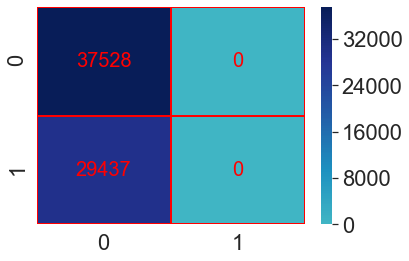

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class, labels=[0,1])

sn.set(font_scale=2.0) # for label size
akws = {"size": 20,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cnf_matrix, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.show()
#ax.figure.savefig('BrookLyn_Binary.png')

<h4>Lets try another solver</h4>

Using lbfgs

In [27]:
LR1= LogisticRegression(random_state=34, solver='lbfgs', multi_class="auto", n_jobs=-1, C=1).fit(X_train, np.ravel(y_train,order='C'))
LR1

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=34,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [28]:
# yhat_saga = LR1.predict(X_test)
# yhat_saga
yhat_lbfgs = LR1.predict(X_test)
yhat_lbfgs

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [29]:
from sklearn.metrics import jaccard_score
J_saga=jaccard_score(y_test, y_pred_class)
J_lbfgs=jaccard_score(y_test, yhat_lbfgs)
print(J_saga)
print(J_lbfgs)

0.0
0.0004754788751528325


In [30]:
# evaluate predictions
from sklearn import metrics
accur_lbfgs = metrics.accuracy_score(y_test, yhat_lbfgs)
print("Accuracy: %.2f%%" % (accur_lbfgs * 100.0))

Accuracy: 56.05%


In [31]:
#True Positive rate
print(metrics.recall_score(y_test, yhat_lbfgs))

0.00047559194211366647


So in both solver (saga and lbfgs)we get lower value of Jacardian Index, 0 True positve rate. <b>So Logistc Regression's performance not up to the mark</b>

<h3 id="correct_data_format">Logistic Regression is not an appropriate Model for this problem.
Lets Try with XGBOOST MODEL</h3>

In [32]:
from numpy import loadtxt
from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=test_size, random_state=seed)
print ('Train set:', X_test1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)
print(y.shape)

Train set: (88394, 6) (179465,)
Test set: (88394, 6) (88394,)
(267859,)


In [34]:
mXGBC = XGBClassifier()
mXGBC.fit(X_train1, np.ravel(y_train1,order='C'))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
#Now we can predict using our test set:
yhat_XGB = mXGBC.predict(X_test1)
yhat_XGB

array([0, 1, 0, ..., 1, 0, 1], dtype=uint8)

<h2 id="evaluation">Evaluation/ Classification Accuracy For XGBOOST MODEL</h2>

Using jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test1, yhat_XGB)

0.5075861512388024

<h2 id="evaluation">Classification Accuracy: Percentage of correct predication</h2>

Using accuracy score.

In [37]:
# evaluate predictions
accuracy = accuracy_score(y_test1, yhat_XGB)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.39%


### Null Accuracy:
 accuracy that could be achieved by always predicting the most frequent class

In [38]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test1.value_counts()

0    49737
1    38657
Name: Compaint_type_lebel, dtype: int64

In [39]:
# calculate the percentage of ones
y_test1.mean()

0.4373260628549449

In [40]:
# calculate the percentage of zeros
1 - y_test.mean()

0.5604121556036736

In [41]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test1.mean(), 1 - y_test1.mean())

0.5626739371450551

<b>Comparing the true and predicted response values</b>

In [42]:
# print the first 25 true and predicted responses
print('True:', y_test1.values[35:70])
print('Pred:', yhat_XGB[35:70])

True: [1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0]
Pred: [0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


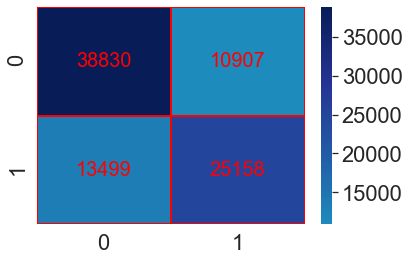

In [44]:
# Compute confusion matrix
cnf_matXGB = confusion_matrix(y_test1, yhat_XGB, labels=[0,1])
#plot_confusion_matrix(cnf_matXGB, classes=['HEAT/HOT WATER=0','HEATING=1'],normalize= False,  title='Confusion matrix')
# Compute confusion matrix

sn.set(font_scale=2.0) # for label size
akws = {"size": 20,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cnf_matXGB, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.show()
#saving the plot for report purposes
ax.figure.savefig('Manhattan_Binary.png')

<h2 id="evaluation">Metrics computed from a confusion matrix</h2>

In [45]:
# save confusion matrix and slice into four pieces
TP = cnf_matXGB[1, 1]
TN = cnf_matXGB[0, 0]
FP = cnf_matXGB[0, 1]
FN = cnf_matXGB[1, 0]
print(TP)

25158


Classification Accuracy: Overall, how often is the classifier correct?

In [46]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test1, yhat_XGB))

0.7238952870104306
0.7238952870104306


<b>Classification Error:</b> Overall, how often is the classifier incorrect?
<uo>
    <li>Also known as "Misclassification Rate"</li>
</uo>

In [47]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test1, yhat_XGB))

0.2761047129895694
0.2761047129895694


<b>Sensitivity/"True Positive Rate":</b> When the actual value is positive, how often is the prediction correct?
<uo>
    <li>How "sensitive" is the classifier to detecting positive instances?</li>
    <li>Also known as "True Positive Rate" or "Recall"?</li>
</uo>

In [48]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test1, yhat_XGB))

0.6508006311922808
0.6508006311922808


<b>Specificity:</b> When the actual value is negative, how often is the prediction correct?
<uo>
    <li>How "specific" (or "selective") is the classifier in predicting negative instances?</li>
</uo>

In [49]:
print(TN / float(TN + FP))

0.7807065162756097


<b>False Positive Rate:</b> When the actual value is negative, how often is the prediction incorrect?


In [50]:
print(FP / float(TN + FP))

0.21929348372439028


<b>Precision:</b> When a positive value is predicted, how often is the prediction correct?
<uo>
    <li>How "precise" is the classifier when predicting positive instances?</li>
</uo>

In [51]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test1, yhat_XGB))

0.6975738250381256
0.6975738250381256


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.
<b>Conclusion:</b>
<uo>
    <li>Confusion matrix for <b>XGBOOST MODEL</b> provide better performance than <b> Regression Model</b></li>
    <li>We can calculate Various classification metrics, and these metrics can guide usour model selection</li>
</uo>

<b>Which metrics should we focus on?</b>
<uo>
    <li><b>Choice of metric depends on our business objective</b> </li>
    <li><b>Spam filter (positive class is "spam"):</b> Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)</li>
    <li><b>Fraudulent transaction detector (positive class is "fraud"):</b> Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)</li>
</uo>

 


<hr>
<p>Copyright &copy; 2020 Mustafizur Rahman <a href="https://www.linkedin.com/in/dr-mohammad-rahman-2434b313/">LinkedIn</a>.</p>